<a href="https://colab.research.google.com/github/seradiazpin/NeuralNetworksUnal2019/blob/master/ProyectoRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalidad en equilibrio  vs Equilibrio alterado

## Importamos lo necesario
#### Instala qgrid --> !pip install qgrid


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import pandas as pd
import scipy.signal as ss
import scipy.stats as st
import math
import warnings
import sys, os

#Configuraciones de MATPLOTLIB
%matplotlib inline
matplotlib.rc('legend', numpoints=1, fontsize=16)

#No mostrar warnings
warnings.filterwarnings("ignore")

#Precision en PANDAS
pd.set_option('precision', 4)

## Carga tabla con descriptores calculados
#### Se llama --> dataset.txt

In [0]:
pd.set_option('precision', 3)
path=r'./../'
fname = os.path.join(path, 'dataset.txt')
BDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print("Informacion desde los %s trials cargados (un total de %s sujectos)."
      %(len(BDSinfo), len(pd.unique(BDSinfo.Subject))))
print("%s sujetos, 4 condiciones, 3 repeticiones cargados (%s filas, %s columnas)."
      %(len(pd.unique(BDSinfo.Subject)), BDSinfo.shape[0], BDSinfo.shape[1]))
print("\n\nColunmas:")
BDSinfo.keys()
#En la clase el valor 0 significa 'Equilibrio sano' y el 1 significa 'Equilibrio alterado'

Informacion desde los 1930 trials cargados (un total de 163 sujectos).
163 sujetos, 4 condiciones, 3 repeticiones cargados (1930 filas, 37 columnas).


Colunmas:


Index(['Trial', 'Subject', 'Vision', 'Surface', 'Age', 'BMI', 'Best_T',
       'COPmean_ap', 'COPmean_ml', 'COPsd_ap', 'COPsd_ml', 'COPrms_ap',
       'COPrms_ml', 'COPrange_ap', 'COPrange_ml', 'COPpath_ap', 'COPpath_ml',
       'COPvelm_ap', 'COPvelm_ml', 'COPvelm_r', 'COPvelnorm', 'COParea',
       'COPaxesL', 'COPangle', 'COPfre_p50_ap', 'COPfre_p50_ml', 'COPfrem_ap',
       'COPfrem_ml', 'COPfremax_ap', 'COPfremax_ml', 'COPpow_ap', 'COPpow_ml',
       'COPhurts_ap', 'COPhurts_ml', 'COPdfa_ap', 'COPdfa_ml', 'Clase'],
      dtype='object')

In [0]:
BDSinfo.head(5)

,Trial,Subject,Vision,Surface,Age,BMI,Best_T,COPmean_ap,COPmean_ml,COPsd_ap,...,COPfrem_ml,COPfremax_ap,COPfremax_ml,COPpow_ap,COPpow_ml,COPhurts_ap,COPhurts_ml,COPdfa_ap,COPdfa_ml,Clase
0,BDS00001,1,Open,Firm,33.0,21.849,25,-2.995e-17,3.041e-17,0.285,...,0.190,0.100,0.033,0.068,0.010,0.920,0.811,1.431,1.508,0
1,BDS00002,1,Open,Firm,33.0,21.849,25,-4.718e-18,6.472e-17,0.370,...,0.155,0.033,0.033,0.162,0.018,0.905,0.838,1.447,1.597,0
2,BDS00003,1,Open,Firm,33.0,21.849,25,5.075e-17,1.109e-16,0.206,...,0.153,0.067,0.033,0.039,0.009,0.908,0.816,1.354,1.506,0
3,BDS00004,1,Closed,Firm,33.0,21.849,25,-1.658e-17,3.828e-17,0.181,...,0.208,0.033,0.033,0.030,0.008,0.910,0.827,1.312,1.547,0
4,BDS00005,1,Closed,Firm,33.0,21.849,25,-6.560e-18,-1.539e-16,0.380,...,0.123,0.067,0.033,0.092,0.017,0.903,0.823,1.473,1.608,0


## Individuos con enfermedades que afectan el equilibrio

In [0]:
data = BDSinfo[BDSinfo['Clase']==1]
print('%s subjetos.' %len(pd.unique(data.Subject)))
print("Informacion de %s sujetos por 4 condiciones cargados (%s filas, %s columnas)."
      %(len(pd.unique(data.Subject)), data.shape[0], data.shape[1]))
data.head(5)

49 subjetos.
Informacion de 49 sujetos por 4 condiciones cargados (562 filas, 37 columnas).


,Trial,Subject,Vision,Surface,Age,BMI,Best_T,COPmean_ap,COPmean_ml,COPsd_ap,...,COPfrem_ml,COPfremax_ap,COPfremax_ml,COPpow_ap,COPpow_ml,COPhurts_ap,COPhurts_ml,COPdfa_ap,COPdfa_ml,Clase
564,BDS00565,48,Closed,Foam,34.333,24.262,22,6.785e-17,-5.842e-16,0.934,...,0.425,0.400,0.400,1.041,0.416,0.959,0.959,1.565,1.428,1
565,BDS00566,48,Closed,Foam,34.333,24.262,22,-4.567e-16,-1.601e-16,1.092,...,0.352,0.033,0.100,0.849,0.355,0.960,0.961,1.566,1.473,1
566,BDS00567,48,Closed,Foam,34.333,24.262,22,-3.566e-16,-7.235e-18,0.975,...,0.336,0.033,0.100,0.972,0.309,0.966,0.956,1.561,1.469,1
567,BDS00568,48,Closed,Firm,34.333,24.262,22,4.480e-16,5.657e-16,0.477,...,0.251,0.033,0.033,0.128,0.053,0.941,0.938,1.226,1.345,1
568,BDS00569,48,Closed,Firm,34.333,24.262,22,2.761e-16,-1.482e-16,0.358,...,0.392,0.033,0.033,0.085,0.019,0.946,0.938,1.434,1.319,1


## Revisamos cardinales de clases

In [0]:
data = BDSinfo.copy()
data[['Clase', 'Trial']].groupby(['Clase']).count()

,Trial
Clase,
0,1368
1,562


## Separacion por ejercicio

In [0]:
#Trabajo con una copia
#Universo 1: Ojos abiertos en plataforma estable
U1=data.loc[(data.Vision =='Open') & (data.Surface =='Firm')].copy()
print("Universo 1: ojos abiertos y superficie estable. %s registros con %s variables."%(U1.shape[0], U1.shape[1]))
print(U1[['Clase', 'Trial']].groupby(['Clase']).count())

#Universo 2: Ojos cerrados en plataforma estable
U2=data.loc[(data.Vision =='Closed') & (data.Surface =='Firm')].copy()
print("\n\nUniverso 2: ojos cerrados y superficie estable. %s registros con %s variables."%(U2.shape[0], U2.shape[1]))
print(U2[['Clase', 'Trial']].groupby(['Clase']).count())

#Universo 3: Ojos abiertos en plataforma inestable 
U3=data.loc[(data.Vision =='Open') & (data.Surface =='Foam')].copy()
print("\n\nUniverso 3: ojos abiertos y superficie inestable. %s registros con %s variables."%(U3.shape[0], U3.shape[1]))
print(U3[['Clase', 'Trial']].groupby(['Clase']).count())

#Universo 4: Ojos cerrados en plataforma inestable
U4=data.loc[(data.Vision =='Closed') & (data.Surface =='Foam')].copy()
print("\n\nUniverso 4: ojos cerrados y superficie inestable.%s registros con %s variables."%(U4.shape[0], U4.shape[1]))
print(U4[['Clase', 'Trial']].groupby(['Clase']).count())

Universo 1: ojos abiertos y superficie estable. 489 registros con 37 variables.
       Trial
Clase       
0        342
1        147


Universo 2: ojos cerrados y superficie estable. 487 registros con 37 variables.
       Trial
Clase       
0        342
1        145


Universo 3: ojos abiertos y superficie inestable. 480 registros con 37 variables.
       Trial
Clase       
0        342
1        138


Universo 4: ojos cerrados y superficie inestable.474 registros con 37 variables.
       Trial
Clase       
0        342
1        132


## Escojemos un universo para explorar

In [0]:
#Lo mas comun een estabilometria es ojos abiertos con plataforma firme
universe=U1.copy()
print("Informacion de %s sujetos (%s filas, %s columnas)." %(len(universe), universe.shape[0], universe.shape[1]))
universe.head(5)
#extraemos las caractristicas desde el dataset
features = list(universe)[4:-1]
print(features)

Informacion de 489 sujetos (489 filas, 37 columnas).
['Age', 'BMI', 'Best_T', 'COPmean_ap', 'COPmean_ml', 'COPsd_ap', 'COPsd_ml', 'COPrms_ap', 'COPrms_ml', 'COPrange_ap', 'COPrange_ml', 'COPpath_ap', 'COPpath_ml', 'COPvelm_ap', 'COPvelm_ml', 'COPvelm_r', 'COPvelnorm', 'COParea', 'COPaxesL', 'COPangle', 'COPfre_p50_ap', 'COPfre_p50_ml', 'COPfrem_ap', 'COPfrem_ml', 'COPfremax_ap', 'COPfremax_ml', 'COPpow_ap', 'COPpow_ml', 'COPhurts_ap', 'COPhurts_ml', 'COPdfa_ap', 'COPdfa_ml']


# Pre-procesando los datos

In [0]:
# Inputs y outputs
X = universe.loc[:, features].values
Y = universe.loc[:,['Clase']].values
X.shape

(489, 32)

In [0]:
#Normalizando los datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X.shape

(489, 32)

In [0]:
#Codificando las clases para que sean binarias, si es que no lo son.
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#y = ohe.fit_transform(y).toarray()

In [0]:
#Dividiendo el dataset 90% vs 10%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440, 32)
(49, 32)
(440, 1)
(49, 1)


# MLP en Keras

In [0]:
#!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
# Fija las semillas aleatorias para la reproducibilidad
np.random.seed(7)

Using TensorFlow backend.


In [0]:
# Crea el modelo
model2 = Sequential()
#Agregamos una capa de entrada de 12 neuronas y una capa oculta de 10 neuronas
model2.add(Dense(16, input_dim=32, activation='relu'))
#print(model.weights)
#Agregamos una segunda capa oculta de 8 neuronas
model2.add(Dense(8, activation='relu'))
model2.add(Dense(4, activation='relu'))
#Agregamos una capa de salida de una neurona
model2.add(Dense(1, activation='sigmoid'))



In [0]:
# Compila el modelo.
# Especificamos la funcion de perdida, el metodo de optimizador y la metrica
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Entrenamos el modelo
# Iteraciones=100. Cada cuanto se actualizan los pesos = 10
history = model2.fit(X_train, y_train, epochs=150, batch_size=20)

Epoch 1/150
440/440 [==============================] - 0s 450us/step - loss: 0.7156 - accuracy: 0.6682
Epoch 2/150
440/440 [==============================] - 0s 88us/step - loss: 0.6453 - accuracy: 0.6818
Epoch 3/150
440/440 [==============================] - 0s 85us/step - loss: 0.6084 - accuracy: 0.7136
Epoch 4/150
440/440 [==============================] - 0s 84us/step - loss: 0.5771 - accuracy: 0.7386
Epoch 5/150
440/440 [==============================] - 0s 87us/step - loss: 0.5521 - accuracy: 0.7591
Epoch 6/150
440/440 [==============================] - 0s 84us/step - loss: 0.5331 - accuracy: 0.7614
Epoch 7/150
440/440 [==============================] - 0s 121us/step - loss: 0.5146 - accuracy: 0.7568
Epoch 8/150
440/440 [==============================] - 0s 80us/step - loss: 0.4996 - accuracy: 0.7727
Epoch 9/150
440/440 [==============================] - 0s 78us/step - loss: 0.4857 - accuracy: 0.7750
Epoch 10/150
440/440 [==============================] - 0s 89us/step - loss: 0.4

In [0]:
# Evalua el modelo contra si mismo
scores = model2.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

440/440 [==============================] - 0s 169us/step

accuracy: 98.86%


In [0]:
# Calcula y redondeamos las predicciones
y_pred_round = np.round(model2.predict(X_test))

In [0]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred_round,y_test)
print('Precisión:', a*100)

Precisión: 83.6734693877551


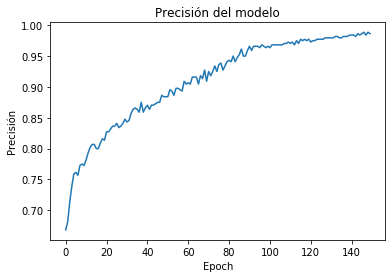

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

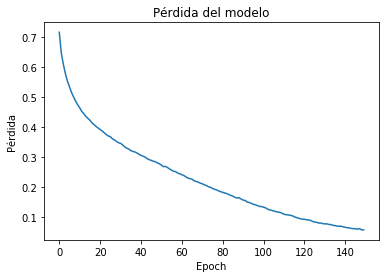

In [0]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss']) 
plt.title('Pérdida del modelo') 
plt.ylabel('Pérdida') 
plt.xlabel('Epoch') 
#plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()